In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from PIL import Image
from keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, add

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/spectogram_files.zip"

In [21]:
inputs = Input((160, 32, 2))

# Encoder
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = BatchNormalization()(c1)
c1 = Dropout(0.1)(c1)
p1 = MaxPooling2D((2, 1))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = BatchNormalization()(c2)
c2 = Dropout(0.1)(c2)

p2 = MaxPooling2D((2, 1))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = BatchNormalization()(c3)
c3 = Dropout(0.1)(c3)
p3 = MaxPooling2D((2, 1))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = BatchNormalization()(c4)
c4 = Dropout(0.2)(c4)
p4 = MaxPooling2D((2, 1))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = BatchNormalization()(c5)
c5 = Dropout(0.3)(c5)

# Decoder
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 1), padding='same')(c5)
u6 = add([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = BatchNormalization()(c6)
c6 = Dropout(0.2)(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 1), padding='same')(c6)
u7 = add([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = BatchNormalization()(c7)
c7 = Dropout(0.1)(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 1), padding='same')(c7)
u8 = add([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = BatchNormalization()(c8)
c8 = Dropout(0.1)(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 1), padding='same')(c8)
u9 = add([u9, c1])
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = BatchNormalization()(c9)
c9 = Dropout(0.1)(c9)


outputs = Conv2D(1, (1, 1), activation='linear')(c9)


unet_model = Model(inputs=[inputs], outputs=[outputs])
unet_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3), loss='mean_squared_error', metrics=[RootMeanSquaredError()])


unet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 32, 2)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 160, 32, 16)  304         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 160, 32, 16)  64         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                            

Train Data shape: (6200, 160, 32)


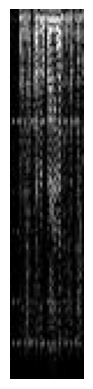

In [4]:
# Define the folder path
folder_path = "spectrograms_files/nearend_mic_signal"  # Replace with the actual folder path
train_data_1 = []
# Iterate over all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Open the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        image_array = np.transpose(image_array, (1, 0))
        train_data_1.append(image_array)
# Convert the train_data list to a NumPy array
train_data_1 = np.stack(train_data_1, axis=-1)
train_data_1 = np.transpose(train_data_1, (2, 1, 0))

# Print the shape of the train_data array
print("Train Data shape:", train_data_1.shape)
# Display the image
plt.imshow(train_data_1[0], cmap='gray')
plt.axis('off')
plt.show()

Train Data shape: (6200, 160, 32)


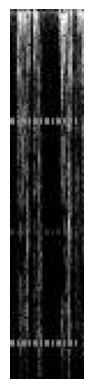

<class 'numpy.ndarray'>


In [5]:
# Define the folder path
folder_path = "spectrograms_files/farend_speech"  # Replace with the actual folder path
train_data_2 = []
# Iterate over all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Open the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        image_array = np.transpose(image_array, (1, 0))
        train_data_2.append(image_array)
# Convert the train_data list to a NumPy array
train_data_2 = np.stack(train_data_2, axis=-1)
train_data_2 = np.transpose(train_data_2, (2, 1, 0))

# Print the shape of the train_data array
print("Train Data shape:", train_data_2.shape)
# Display the image
plt.imshow(train_data_2[1], cmap='gray')
plt.axis('off')
plt.show()
print(type(train_data_2))

Train Data shape: (6200, 160, 32)


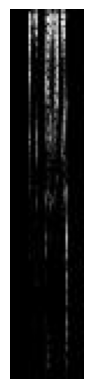

<class 'numpy.ndarray'>


In [6]:
# Define the folder path
folder_path = "spectrograms_files/nearend_speech"  # Replace with the actual folder path
train_labels = []
# Iterate over all image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Open the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        image_array = np.transpose(image_array, (1, 0))
        train_labels.append(image_array)
# Convert the train_data list to a NumPy array
train_labels = np.stack(train_labels, axis=-1)
train_labels = np.transpose(train_labels, (2, 1, 0))

# Print the shape of the train_data array
print("Train Data shape:", train_labels.shape)
# Display the image
plt.imshow(train_labels[1], cmap='gray')
plt.axis('off')
plt.show()
print(type(train_labels))

In [7]:
train = np.zeros(list(train_labels.shape) + [2])
train[:,:,:,0] = train_data_1
train[:,:,:,1] = train_data_2

In [8]:
train.shape

(6200, 160, 32, 2)

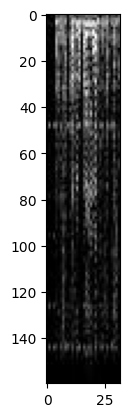

In [9]:
plt.imshow(train[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
tf.config.run_functions_eagerly(True)

In [22]:
### Starting from the saved checkpoint ###

# Unzipping the ckpt
# !unzip -q "/content/ckpt.zip"

checkpoint_path = "/content/drive/MyDrive/training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

unet_model.load_weights(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



In [ ]:
# Train the model
unet_model.fit(train, train_labels, epochs=1000, batch_size=64, callbacks=[cp_callback])

Epoch 1/1000
97/97 [==============================] - ETA: 0s - loss: 413.5879 - root_mean_squared_error: 20.3369
Epoch 1: saving model to /content/drive/MyDrive/training/cp.ckpt
97/97 [==============================] - 21s 105ms/step - loss: 413.5879 - root_mean_squared_error: 20.3369
Epoch 2/1000
97/97 [==============================] - ETA: 0s - loss: 411.9831 - root_mean_squared_error: 20.2974
Epoch 2: saving model to /content/drive/MyDrive/training/cp.ckpt
97/97 [==============================] - 10s 106ms/step - loss: 411.9831 - root_mean_squared_error: 20.2974
Epoch 3/1000
97/97 [==============================] - ETA: 0s - loss: 413.0608 - root_mean_squared_error: 20.3239
Epoch 3: saving model to /content/drive/MyDrive/training/cp.ckpt
97/97 [==============================] - 10s 107ms/step - loss: 413.0608 - root_mean_squared_error: 20.3239
Epoch 4/1000
97/97 [==============================] - ETA: 0s - loss: 413.0657 - root_mean_squared_error: 20.3240
Epoch 4: saving model to 

In [ ]:
unet_model.save('/content/drive/MyDrive/training/final_model.h5')

In [ ]:
# ### Loading The SAVED MODEL ###

# Loads the weights
# model = Model(inputs=[inputs], outputs=[outputs])
# model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-4), loss='mean_squared_error', metrics=[RootMeanSquaredError()])
# model.load_weights(checkpoint_path)
# test = unet_model.predict(train)
# print(test.shape)

194/194 [==============================] - 11s 11ms/step
(6200, 160, 32, 1)


In [ ]:
test = unet_model.predict(train)

194/194 [==============================] - 6s 31ms/step


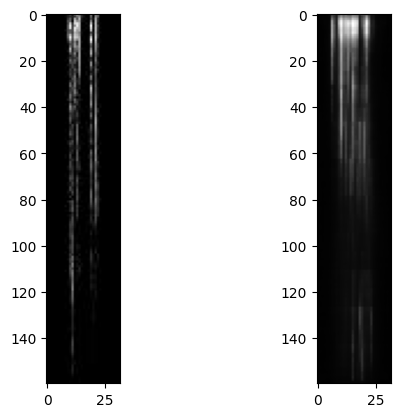

In [ ]:
# Plotting results

plt.subplot(1, 2, 1)
plt.imshow(train_labels[0,:,:], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(test[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Train the model
# unet_model.fit(train, train_labels, epochs=100, batch_size=64)

Epoch 1/100
97/97 [==============================] - 10s 102ms/step - loss: 1156.7762 - root_mean_squared_error: 34.0114
Epoch 2/100
97/97 [==============================] - 10s 102ms/step - loss: 1146.8580 - root_mean_squared_error: 33.8653
Epoch 3/100
97/97 [==============================] - 10s 102ms/step - loss: 1137.2351 - root_mean_squared_error: 33.7229
Epoch 4/100
97/97 [==============================] - 10s 102ms/step - loss: 1127.3228 - root_mean_squared_error: 33.5756
Epoch 5/100
97/97 [==============================] - 10s 102ms/step - loss: 1117.6475 - root_mean_squared_error: 33.4312
Epoch 6/100
97/97 [==============================] - 10s 102ms/step - loss: 1107.9774 - root_mean_squared_error: 33.2863
Epoch 7/100
97/97 [==============================] - 10s 102ms/step - loss: 1098.4763 - root_mean_squared_error: 33.1433
Epoch 8/100
97/97 [==============================] - 10s 103ms/step - loss: 1089.0354 - root_mean_squared_error: 33.0005
Epoch 9/100
97/97 [=============

In [ ]:
test = unet_model.predict(train)
print(test.shape)

194/194 [==============================] - 6s 31ms/step
(6200, 160, 32, 1)


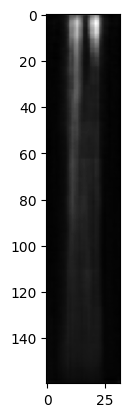

In [ ]:
plt.imshow(test[90,:,:,:], cmap='gray')
plt.show()